# Preprocess

__`Group Number`__ : **10**

__`Group Members`__ 

|STUDENT NAME|STUDENT NUMBER|EMAIL|
|---|---|---|
|Ianis Rușitoru|20220620|20220620@novaims.unl.pt|
|Ricardo Almeida|20220584|20220584@novaims.unl.pt|
|Nichita Zamisnii|20220617|20220617@novaims.unl.pt|
|Pedro Paris|20191217|20191217@novaims.unl.pt|


__`Links`__   

[Github Data Source](https://github.com/garythung/trashnet)

[Google Drive Project Folder](https://drive.google.com/drive/folders/1KfXat-zOA1sJ-0m4-4yhEesj48KawVAj)

__`Summary`__ 

Step 1:  Create Dataset Folder with train & test sub-folders

Step 2:  Properties of the train folder
    
Step 3: Reduce the data

Step 4: Data Visualization

Step 5: Store the reduced data 

Step 6: Properties check

Step 7: Zip 'reduced_data'

__`Findings`__ 

- Since the data was not partitioned in the appropriate format for the image_class_from_directory we had to programmatically reshape

- Images were transformed from original size to a reduced version of 256x256 RGB and exported


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential, layers, initializers, regularizers, optimizers, metrics 

import os
import time
import shutil
import random 
import zipfile
import cv2

import numpy as np
import pandas as pd

from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap

__`Step 1`__ Create Dataset Folder with train & test sub-folders

In [ ]:
# Set the seed to ensure reproducibility
random.seed(42)

# Define the paths to the original and new directories
original_dataset_dir = 'data'
base_dir = 'dataset'

# Define the names of the directories for training, validation, and testing
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic']

train_pct = 0.85
test_pct = 0.15

# Create the directories for training, validation, and testing
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop over each class and split the images into the appropriate directories
for cls in classes:
    # Define the paths to the original and new directories for this class
    cls_original_dir = os.path.join(original_dataset_dir, cls)
    cls_train_dir = os.path.join(train_dir, cls)
    cls_test_dir = os.path.join(test_dir, cls)
    
    os.makedirs(cls_train_dir, exist_ok=True)
    os.makedirs(cls_test_dir, exist_ok=True)
    
    # Get the list of image filenames for this class
    fnames = os.listdir(cls_original_dir)
    
    # Shuffle the filenames
    random.shuffle(fnames)
    
    # Split the filenames into training, validation, and testing sets
    train_fnames = fnames[:int(len(fnames)*train_pct)]
    test_fnames = fnames[int(len(fnames)*(train_pct)):]
    
    # Copy the images to the appropriate directories
    for fname in train_fnames:
        src = os.path.join(cls_original_dir, fname)
        dst = os.path.join(cls_train_dir, fname)
        shutil.copyfile(src, dst)

    for fname in test_fnames:
        src = os.path.join(cls_original_dir, fname)
        dst = os.path.join(cls_test_dir, fname)
        shutil.copyfile(src, dst)


__`Step 2`__ Properties of the train folder

In [ ]:
# Define the path to the dataset folder
data_dir = "C:\\Users\\Chip7 MemMartins\\Desktop\\Project\\dataset\\train"

# Get the list of classes (i.e., subfolders) in the data directory
classes = os.listdir(data_dir)

num_images = []
total_images = 0
image_sizes = []

# Loop through each class folder
for c in classes:
    class_dir = os.path.join(data_dir, c)
    # Get the list of image file names in the class folder
    file_names = os.listdir(class_dir)
    num_images.append(len(file_names))
    total_images += len(file_names)
    # Loop through each image file in the class folder
    for f in file_names:
        # Open the image and get its size
        img = Image.open(os.path.join(class_dir, f))
        size = img.size
        image_sizes.append(size)

image_sizes = np.array(image_sizes)

print(data_dir)
print("Number of classes:", len(classes))
for i, c in enumerate(classes):
    print("Number of images in", c, ":", num_images[i])
print("Total number of images:", total_images)
print("Size of images (width x height):", np.unique(image_sizes, axis=0))


C:\Users\Chip7 MemMartins\Desktop\Project\dataset\train
Number of classes: 5
Number of images in cardboard : 342
Number of images in glass : 425
Number of images in metal : 348
Number of images in paper : 504
Number of images in plastic : 409
Total number of images: 2028
Size of images (width x height): [[3264 2448]
 [4032 3024]]


In [ ]:
def get_aspect_ratios(folder_path):
    aspect_ratios = []
    for image_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_name)
        img = cv2.imread(image_path)
        if img is not None:
            height, width, _ = img.shape
            aspect_ratio = width / height
            aspect_ratios.append(aspect_ratio)
    return aspect_ratios

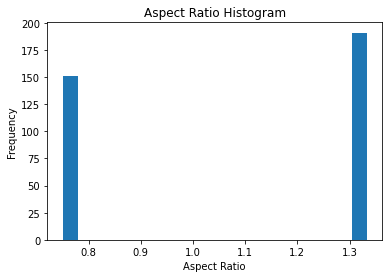

In [ ]:
#cardboard choose as an example
aspect_ratios = get_aspect_ratios("C:\\Users\\Chip7 MemMartins\\Desktop\\Project\\dataset\\train\\cardboard")

plt.hist(aspect_ratios, bins=20)
plt.title('Aspect Ratio Histogram')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.show()

__`Step 3`__ Reduce the data

In [ ]:
# Set the connection string
path = "C:\\Users\\Chip7 MemMartins\\Desktop\\Project\\"
main_folder, training_folder,testing_folder = "dataset\\", "train\\", "test\\"

In [ ]:
image_size=(256, 256)
crop_to_aspect_ratio=True
color_mode='rgb'
batch_size=32
label_mode="categorical"
validation_split=0.15
shuffle=True
seed=0

In [ ]:
# Generate an object of type tf.data.Dataset 
ds_train = image_dataset_from_directory(path + main_folder + training_folder, 
                                                image_size=image_size,
                                                crop_to_aspect_ratio=crop_to_aspect_ratio,
                                                color_mode=color_mode,
                                                batch_size=batch_size,
                                                label_mode=label_mode,
                                                shuffle=shuffle,
                                                seed=seed)
# Check object properties
print("\nObject's type:\t", type(ds_train))
print("Is it a tf.data.Dataset?\t R:",isinstance(ds_train, tf.data.Dataset))
print("Classes:", ds_train.class_names)

Found 2028 files belonging to 5 classes.

Object's type:	 <class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
Is it a tf.data.Dataset?	 R: True
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic']


In [ ]:
ds_test = image_dataset_from_directory(path + main_folder + testing_folder, 
                                       image_size=image_size,
                                       crop_to_aspect_ratio=crop_to_aspect_ratio,
                                       color_mode=color_mode,
                                       batch_size=batch_size,
                                       label_mode=label_mode,
                                       shuffle=shuffle,
                                       seed=seed)
# Check object properties
print("\nObject's type:\t", type(ds_train))
print("Is it a tf.data.Dataset?\t R:",isinstance(ds_train, tf.data.Dataset))
print("Classes:", ds_train.class_names)

Found 362 files belonging to 5 classes.

Object's type:	 <class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
Is it a tf.data.Dataset?	 R: True
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic']


__`Step 4`__ Data Visualization

In [ ]:
def show_sample_batch(ds, grid_size=(3, 3)):
    n_images = grid_size[0]*grid_size[1]
    # Get a batch via iteration
    iter_ = iter(ds)
    batch_x, batch_y = iter_.next()
    batch_x, batch_y = batch_x[0:n_images], batch_y[0:n_images]
    # Plot the images
    plt.figure(figsize=(10, 10))
    for i, (img, y) in enumerate(zip(batch_x, batch_y)):
        ax = plt.subplot(grid_size[0], grid_size[1],  i + 1)
        plt.imshow(tf.cast(img, tf.int32))
        plt.title("{} image of class \"{}\"".format(img.shape, y), size=8)
        plt.axis("off")

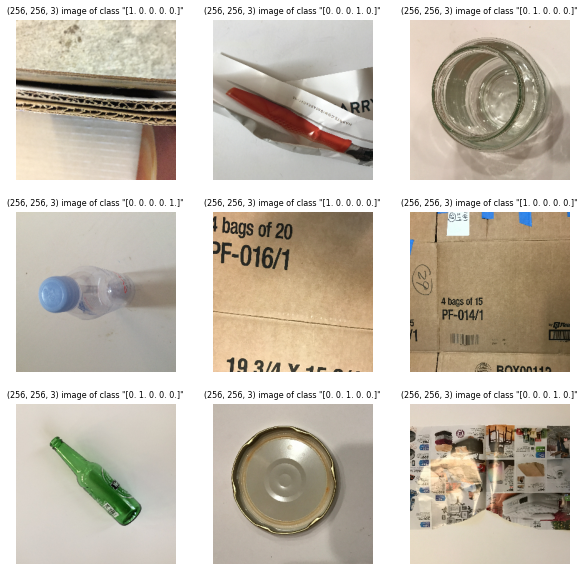

In [ ]:
show_sample_batch(ds_train)

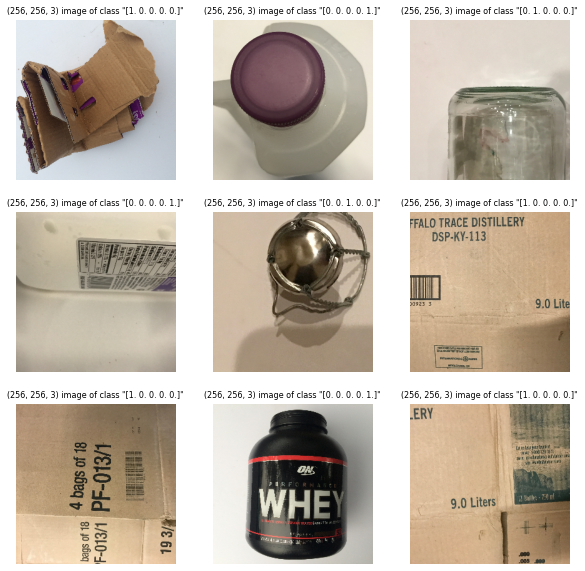

In [ ]:
show_sample_batch(ds_test)

In [ ]:
#Create an iterator for the training dataset
iter_train = iter(ds_train)
#Get the first batch of the training data and labels from the iterator
batch_x_train, batch_y_train = iter_train.next()
#Print the shape of the batched training data and labels
print(batch_x_train.shape, batch_y_train.shape)
#Print the first 2x2x1 slice of the first image in the batch
print("\nSample of x_train:", batch_x_train[0, 0:2, 0:2, 0])
#Print the first five labels in the batch
print("\nSample of y_train:", batch_y_train[0:5])
#Compute and print the average of the labels in the batch
print("Sample average of y_train:", tf.reduce_mean(batch_y_train))

(32, 256, 256, 3) (32, 5)

Sample of x_train: tf.Tensor(
[[214.      215.87012]
 [214.12988 215.78125]], shape=(2, 2), dtype=float32)

Sample of y_train: tf.Tensor(
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]], shape=(5, 5), dtype=float32)
Sample average of y_train: tf.Tensor(0.2, shape=(), dtype=float32)


__`Step 5`__ Store the reduced data

In [ ]:
# Create the output directories if they do not exist
os.makedirs('reduced_dataset/train', exist_ok=True)
os.makedirs('reduced_dataset/test', exist_ok=True)

classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic']

# Save the images and labels from ds_train
train_counter = 0
for images, labels in ds_train:
    for i in range(images.shape[0]):
        img = images[i].numpy()
        label = classes[tf.argmax(labels[i]).numpy()]
        dest = os.path.join('reduced_dataset/train', label)
        os.makedirs(dest, exist_ok=True)
        img_filename = f'{label}_train_{train_counter}.jpg'
        img_path = os.path.join(dest, img_filename)
        tf.keras.preprocessing.image.save_img(img_path, img)
        train_counter += 1

# Save the images and labels from ds_test
test_counter = 0
for images, labels in ds_test:
    for i in range(images.shape[0]):
        img = images[i].numpy()
        label = classes[tf.argmax(labels[i]).numpy()]
        dest = os.path.join('reduced_dataset/test', label)
        os.makedirs(dest, exist_ok=True)
        img_filename = f'{label}_test_{test_counter}.jpg'
        img_path = os.path.join(dest, img_filename)
        tf.keras.preprocessing.image.save_img(img_path, img)
        test_counter += 1

__`Step 6`__ Properties check

#### Confirmation - we must have: 
##### Check if we got the correct number of images after the reduction
Number of classes: 5 <br>
Number of images in cardboard : 342<br>
Number of images in glass : 425<br>
Number of images in metal : 348<br>
Number of images in paper : 504<br>
Number of images in plastic : 409<br>
Total number of images: 2028<br>
Size of images (width x height): [[128 128]]

In [ ]:
# Define the path to the dataset folder
data_dir = "C:\\Users\\Chip7 MemMartins\\Desktop\\Project\\reduced_dataset\\train"

# Get the list of classes (i.e., subfolders) in the data directory
classes = os.listdir(data_dir)

num_images = []
total_images = 0
image_sizes = []

# Loop through each class folder
for c in classes:
    class_dir = os.path.join(data_dir, c)
    # Get the list of image file names in the class folder
    file_names = os.listdir(class_dir)
    num_images.append(len(file_names))
    total_images += len(file_names)
    # Loop through each image file in the class folder
    for f in file_names:
        # Open the image and get its size
        img = Image.open(os.path.join(class_dir, f))
        size = img.size
        image_sizes.append(size)

image_sizes = np.array(image_sizes)

print(data_dir)
print("Number of classes:", len(classes))
for i, c in enumerate(classes):
    print("Number of images in", c, ":", num_images[i])
print("Total number of images:", total_images)
print("Size of images (width x height):", np.unique(image_sizes, axis=0))



C:\Users\Chip7 MemMartins\Desktop\Project\reduced_dataset\train
Number of classes: 5
Number of images in cardboard : 342
Number of images in glass : 425
Number of images in metal : 348
Number of images in paper : 504
Number of images in plastic : 409
Total number of images: 2028
Size of images (width x height): [[256 256]]


__`Step 7`__ Zip 'reduced_data'

In [ ]:
# Define the path of the folder you want to zip
folder_path = 'reduced_dataset'

# Define the name and path of the zip file you want to create
zip_file_path = 'reduced_dataset.zip'

# Create a ZipFile object with the name and path of the zip file
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zip_file:
    # Loop through each file in the folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            # Add the file to the zip file
            zip_file.write(file_path, os.path.relpath(file_path, folder_path))
            
print(f"The folder {folder_path} was zipped to {zip_file_path}.")

The folder reduced_dataset was zipped to reduced_dataset.zip.
